# Step:1 Business problem understanding

**Loan sancation for applied coapplicants**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\python divers\financial_loan.csv")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [3]:
df.drop(columns="id")

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,Current,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,Current,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,Current,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [5]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

# Step:2 Data Understanding

In [6]:
df["id"].unique()

array([1077430, 1072053, 1069243, ...,  875376,  972997,  682952],
      dtype=int64)

In [7]:
df["id"].value_counts()

1077430    1
317833     1
477433     1
478263     1
443318     1
          ..
351620     1
222829     1
469798     1
857617     1
682952     1
Name: id, Length: 38576, dtype: int64

In [8]:
df["address_state"].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [9]:
df["address_state"].value_counts()

CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: address_state, dtype: int64

In [10]:
df["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [11]:
df["application_type"].value_counts()

INDIVIDUAL    38576
Name: application_type, dtype: int64

In [12]:
df["emp_length"].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [13]:
df["emp_length"].value_counts()

10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64

In [14]:
df["emp_title"].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [15]:
df["emp_title"].value_counts()

US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: emp_title, Length: 28525, dtype: int64

In [16]:
df["grade"].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [17]:
df["grade"].value_counts()

B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: grade, dtype: int64

In [18]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [19]:
df["home_ownership"].value_counts()

RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [20]:
df["issue_date"].unique()

array(['11-02-2021', '01-01-2021', '05-01-2021', '25-02-2021',
       '17-07-2021', '19-11-2021', '11-06-2021', '02-09-2021',
       '09-02-2021', '22-07-2021', '11-09-2021', '11-08-2021',
       '11-12-2021', '11-10-2021', '02-12-2021', '09-10-2021',
       '12-12-2021', '02-02-2021', '07-07-2021', '08-01-2021',
       '09-08-2021', '11-01-2021', '11-11-2021', '09-06-2021',
       '10-01-2021', '11-05-2021', '10-03-2021', '10-05-2021',
       '09-05-2021', '11-04-2021', '09-07-2021', '09-12-2021',
       '09-11-2021', '09-03-2021', '08-10-2021', '08-03-2021',
       '08-11-2021', '07-09-2021', '08-02-2021', '07-08-2021',
       '09-01-2021', '10-12-2021', '11-03-2021', '10-07-2021',
       '11-07-2021', '09-04-2021', '10-02-2021', '10-08-2021',
       '10-04-2021', '10-11-2021', '10-10-2021', '10-06-2021',
       '09-09-2021', '08-08-2021', '10-09-2021', '08-12-2021',
       '08-05-2021', '08-06-2021', '08-09-2021', '08-07-2021',
       '08-04-2021', '07-11-2021', '07-10-2021', '07-12

In [21]:
df["issue_date"].value_counts()

11-12-2021    2188
11-11-2021    2120
11-10-2021    2025
11-09-2021    1980
11-08-2021    1873
              ... 
02-09-2021       1
22-07-2021       1
12-12-2021       1
02-02-2021       1
07-06-2021       1
Name: issue_date, Length: 65, dtype: int64

In [22]:
df["last_credit_pull_date"].unique()

array(['13-09-2021', '14-12-2021', '12-12-2021', '16-03-2021',
       '14-06-2021', '14-07-2021', '15-06-2021', '13-03-2021',
       '13-10-2021', '14-02-2021', '16-04-2021', '15-09-2021',
       '16-05-2021', '09-12-2021', '13-02-2021', '13-11-2021',
       '10-11-2021', '14-04-2021', '12-01-2021', '12-03-2021',
       '11-06-2021', '13-12-2021', '12-06-2021', '14-03-2021',
       '11-04-2021', '11-11-2021', '15-02-2021', '11-07-2021',
       '10-12-2021', '11-01-2021', '07-08-2021', '10-05-2021',
       '12-09-2021', '10-09-2021', '10-02-2021', '11-03-2021',
       '16-02-2021', '12-05-2021', '11-02-2021', '14-10-2021',
       '14-01-2021', '11-09-2021', '14-11-2021', '14-09-2021',
       '15-12-2021', '12-11-2021', '15-11-2021', '14-08-2021',
       '15-07-2021', '11-12-2021', '15-10-2021', '13-08-2021',
       '10-03-2021', '11-08-2021', '16-01-2021', '13-07-2021',
       '13-04-2021', '14-05-2021', '13-05-2021', '15-05-2021',
       '12-08-2021', '15-01-2021', '11-05-2021', '15-04

In [23]:
df["last_credit_pull_date"].value_counts()

16-05-2021    10041
16-04-2021     2477
16-03-2021     1096
13-02-2021      832
16-02-2021      714
              ...  
07-05-2021        1
08-07-2021        1
20-01-2022        1
08-06-2021        1
07-07-2021        1
Name: last_credit_pull_date, Length: 107, dtype: int64

In [24]:
df["last_payment_date"].unique()

array(['13-04-2021', '15-01-2021', '09-01-2021', '12-03-2021',
       '12-08-2021', '13-12-2021', '14-07-2021', '12-10-2021',
       '16-03-2021', '13-08-2021', '13-09-2021', '14-12-2021',
       '13-10-2021', '12-11-2021', '15-02-2021', '10-08-2021',
       '10-02-2021', '11-06-2021', '08-08-2021', '13-06-2021',
       '09-12-2021', '12-02-2021', '12-07-2021', '10-07-2021',
       '13-01-2021', '11-08-2021', '11-10-2021', '11-01-2021',
       '13-07-2021', '09-10-2021', '13-11-2021', '10-11-2021',
       '11-03-2021', '11-07-2021', '12-06-2021', '11-12-2021',
       '09-09-2021', '13-05-2021', '14-03-2021', '08-04-2021',
       '10-10-2021', '10-05-2021', '11-02-2021', '10-09-2021',
       '10-04-2021', '10-06-2021', '12-05-2021', '14-10-2021',
       '14-06-2021', '14-05-2021', '14-01-2021', '14-04-2021',
       '11-09-2021', '14-08-2021', '14-11-2021', '12-01-2021',
       '14-02-2021', '12-12-2021', '12-04-2021', '13-02-2021',
       '14-09-2021', '10-03-2021', '11-11-2021', '11-04

In [25]:
df["last_payment_date"].value_counts()

16-05-2021    1209
13-03-2021    1001
14-12-2021     909
13-05-2021     884
13-02-2021     845
              ... 
08-11-2021      10
08-06-2021      10
08-03-2021       5
08-01-2021       4
08-02-2021       1
Name: last_payment_date, Length: 102, dtype: int64

In [26]:
df["sub_grade"].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [27]:
df["sub_grade"].value_counts()

B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [28]:
df["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [29]:
df["term"].value_counts()

 36 months    28237
 60 months    10339
Name: term, dtype: int64

In [30]:
df["verification_status"].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [31]:
df["verification_status"].value_counts()

Not Verified       16464
Verified           12335
Source Verified     9777
Name: verification_status, dtype: int64

In [32]:
df["annual_income"].unique()

array([ 30000. ,  48000. ,  50000. , ...,  44250. ,  57040.5, 368000. ])

In [33]:
df["annual_income"].value_counts()

60000.00     1471
50000.00     1033
40000.00      859
45000.00      810
75000.00      802
             ... 
47838.00        1
38000.04        1
35570.00        1
171600.00       1
368000.00       1
Name: annual_income, Length: 5096, dtype: int64

In [34]:
df["total_acc"].unique()

array([ 4, 11,  9, 28, 30, 23, 31, 21, 33, 13,  3, 15, 18, 14,  8,  7, 20,
       39, 24, 10, 19, 27,  6, 16, 45, 25,  5, 43, 29, 22, 41, 35, 44, 36,
       17, 26, 37, 32, 47, 52, 42, 46, 12, 50, 34, 59, 38, 63, 49, 48, 61,
       51, 55, 40, 53, 62, 58, 67, 54, 57, 56, 70,  2, 64, 60, 80, 79, 71,
       66, 65, 69, 90, 68, 74, 75, 87, 78, 72, 77, 81, 76, 73],
      dtype=int64)

In [35]:
df["total_acc"].value_counts()

16    1435
15    1420
17    1408
14    1405
20    1398
      ... 
68       1
90       1
69       1
71       1
73       1
Name: total_acc, Length: 82, dtype: int64

In [36]:
df["total_payment"].unique()

array([ 1009,  3939,  3522, ..., 31870, 35721, 33677], dtype=int64)

In [37]:
df["total_payment"].value_counts()

6515     32
11200    31
11197    26
6720     25
5600     23
         ..
11952     1
17003     1
29414     1
3364      1
33677     1
Name: total_payment, Length: 19525, dtype: int64

In [38]:
df["dti"].unique()

array([0.01  , 0.0535, 0.2088, ..., 0.2721, 0.2543, 0.272 ])

In [39]:
df["dti"].value_counts()

0.0000    173
0.1200     48
0.1800     44
0.1920     40
0.1680     38
         ... 
0.2694      1
0.2960      1
0.2961      1
0.2670      1
0.2720      1
Name: dti, Length: 2863, dtype: int64

In [40]:
df["installment"].unique()

array([ 59.83, 109.43, 421.65, ..., 164.99, 113.5 , 627.93])

In [41]:
df["installment"].value_counts()

311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
459.53     1
215.15     1
167.29     1
218.66     1
627.93     1
Name: installment, Length: 15132, dtype: int64

In [42]:
df["int_rate"].unique()

array([0.1527, 0.1864, 0.1596, 0.1065, 0.0603, 0.1465, 0.1427, 0.079 ,
       0.089 , 0.1269, 0.1242, 0.1171, 0.0991, 0.1629, 0.0743, 0.1114,
       0.1109, 0.0766, 0.0751, 0.0963, 0.0894, 0.1148, 0.1149, 0.157 ,
       0.0788, 0.0705, 0.1189, 0.1074, 0.1284, 0.0749, 0.0849, 0.1136,
       0.1199, 0.1095, 0.1099, 0.1221, 0.1241, 0.1134, 0.1399, 0.1367,
       0.1677, 0.1   , 0.0807, 0.0863, 0.0976, 0.1393, 0.0712, 0.1046,
       0.092 , 0.1166, 0.1091, 0.1103, 0.074 , 0.0768, 0.0662, 0.0599,
       0.0699, 0.0729, 0.0542, 0.0676, 0.0774, 0.0692, 0.0932, 0.0617,
       0.0639, 0.0579, 0.08  , 0.0859, 0.0714, 0.0691, 0.0737, 0.0832,
       0.0925, 0.1075, 0.0999, 0.1036, 0.1025, 0.1111, 0.1126, 0.1218,
       0.1059, 0.0962, 0.1037, 0.1158, 0.0988, 0.1062, 0.1253, 0.1051,
       0.1287, 0.1273, 0.138 , 0.1472, 0.1347, 0.1523, 0.1426, 0.1268,
       0.1311, 0.1417, 0.1349, 0.1304, 0.1599, 0.1595, 0.1533, 0.0654,
       0.1183, 0.1357, 0.1306, 0.1422, 0.1316, 0.1496, 0.1565, 0.1474,
      

In [43]:
df["int_rate"].value_counts()

0.1099    932
0.1349    811
0.1149    796
0.0751    755
0.0788    701
         ... 
0.2264      1
0.1671      1
0.1620      1
0.1601      1
0.1754      1
Name: int_rate, Length: 371, dtype: int64

In [44]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [45]:
discrete_categorical=["address_state","application_type","emp_length","emp_title","grade","home_ownership","issue_date",
                         "last_credit_pull_date","last_payment_date","loan_status","next_payment_date","purpose","sub_grade","term"]

discrete_count=["total_acc"]

continous=["annual_income","dti","installment","loan_amount","total_payment","int_rate"]

# Identifying the Distribution

In [46]:
df[continous].describe()

,annual_income,dti,installment,loan_amount,total_payment,int_rate
count,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,11296.066855,12263.348533,0.120488
std,6.429368e+04,0.066662,209.092000,7460.746022,9051.104777,0.037164
min,4.000000e+03,0.000000,15.690000,500.000000,34.000000,0.054200
25%,4.150000e+04,0.082100,168.450000,5500.000000,5633.000000,0.093200
50%,6.000000e+04,0.134200,283.045000,10000.000000,10042.000000,0.118600
75%,8.320050e+04,0.185900,434.442500,15000.000000,16658.000000,0.145900
max,6.000000e+06,0.299900,1305.190000,35000.000000,58564.000000,0.245900


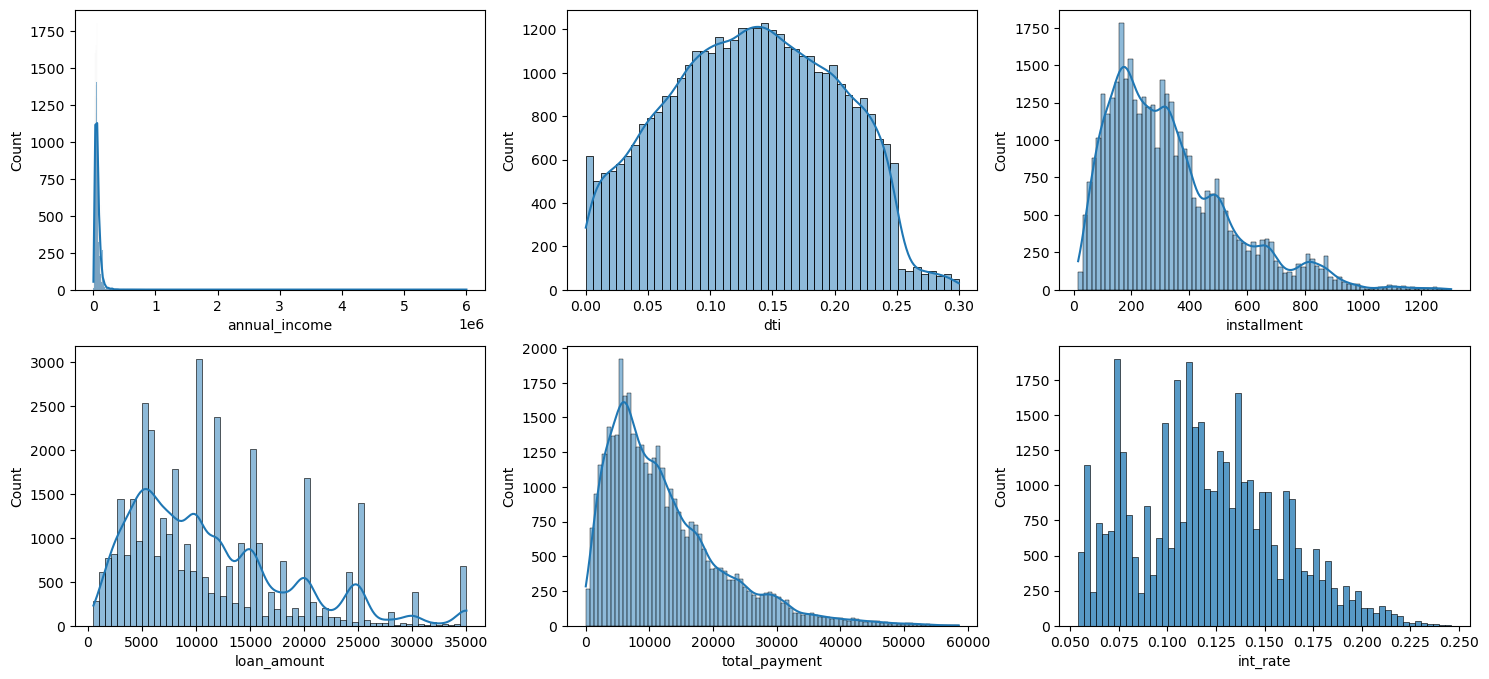

In [47]:
plt.rcParams["figure.figsize"]=(18,8)


plt.subplot(2,3,1)
sns.histplot(df["annual_income"],kde=True)

plt.subplot(2,3,2)
sns.histplot(df["dti"],kde=True)

plt.subplot(2,3,3)
sns.histplot(df["installment"],kde=True)

plt.subplot(2,3,4)
sns.histplot(df["loan_amount"],kde=True)

plt.subplot(2,3,5)
sns.histplot(df["total_payment"],kde=True)

plt.subplot(2,3,6)
sns.histplot(df["int_rate"])

plt.show()

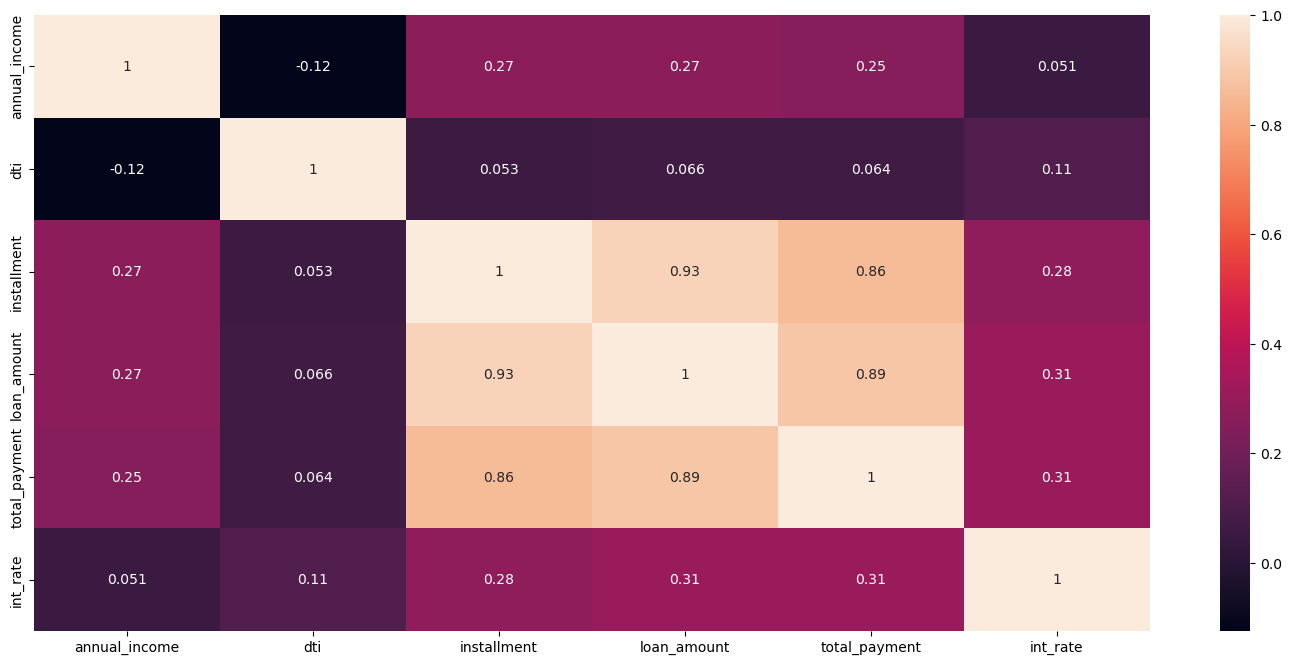

In [48]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

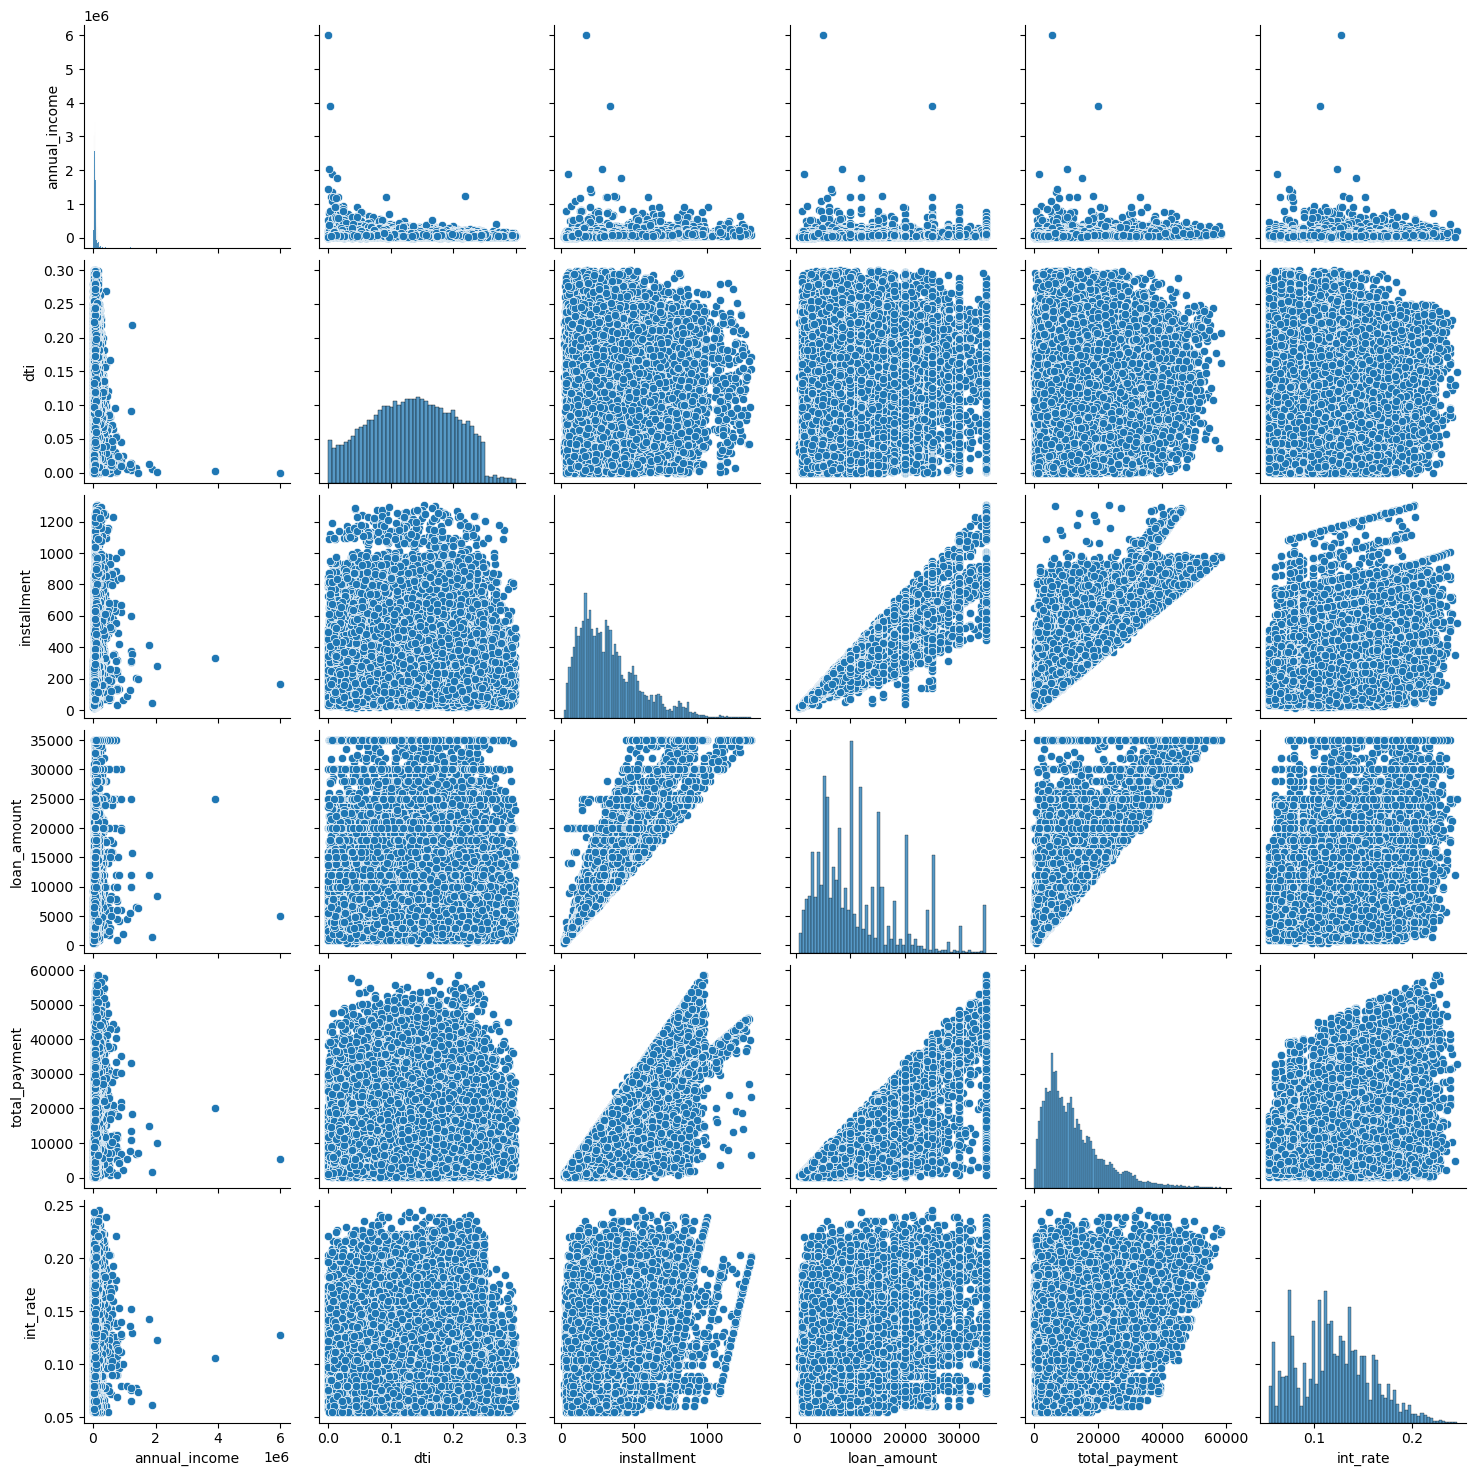

In [49]:
sns.pairplot(df[continous])
plt.show()

# Discrete Variables

In [50]:
df[discrete_categorical].describe()

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,sub_grade,term
count,38576,38576,38576,37138,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,1,11,28525,7,5,65,107,102,3,102,14,35,2
top,CA,INDIVIDUAL,10+ years,US Army,B,RENT,11-12-2021,16-05-2021,16-05-2021,Fully Paid,16-06-2021,Debt consolidation,B3,36 months
freq,6894,38576,8870,135,11674,18439,2188,10041,1209,32145,1209,18214,2834,28237


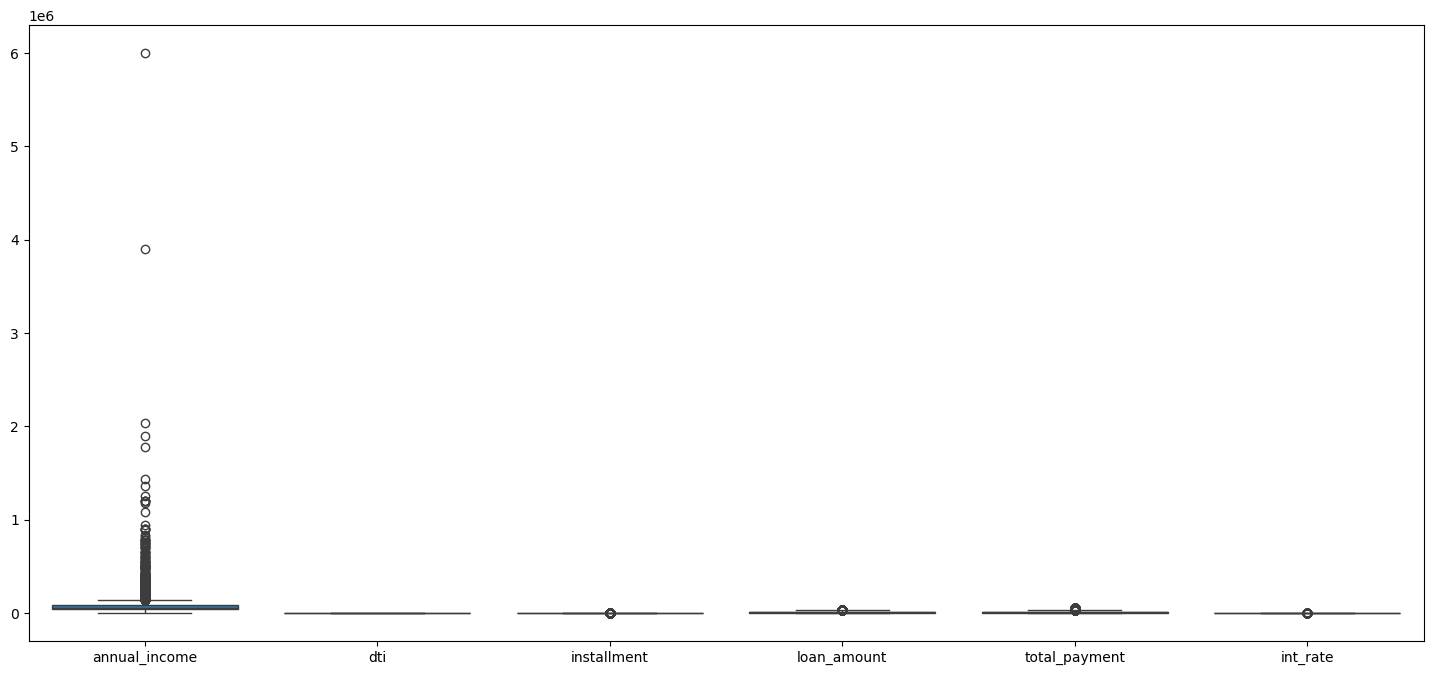

In [51]:
sns.boxplot(df[continous])
plt.show()

# Step:3 Data Preprocessing

**Checking for missing values**

In [52]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [53]:
d=df.fillna(df["emp_title"].mode()[0])
d

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [54]:
d.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [55]:
d.to_excel("Cleaned Financial loan.xlsx")

In [56]:
pwd

'C:\\Users\\Aravind'

# Step:4 Data Analysis

In [57]:
#With that cleaned data sheet we are going to identify the relation betwen the columns  and presentation in power BI and python